# Module 2 Code Challenge

Welcome to your Module 2 Code Challenge. This code challenge is designed to test your understanding of the Module 2 material. It covers:

- Statistical Distributions
- Statistical Tests
- Bayesian Statistics
- Linear Regression

_Read the instructions carefully_. You will be asked both to write code and respond to a few short answer questions.

### Note on the short answer questions: 

For the short answer questions _please use your own words_. The expectation is that you have **not** copied and pasted from an external source, even if you consult another source to help craft your response. While the short answer questions are not necessarily being assessed on grammatical correctness or sentence structure, you should do your best to communicate yourself clearly.

In [1]:
# Run this cell without changes to import the necessary libraries

# Use any additional libraries you like to complete this assessment 

import itertools
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle

from sklearn.metrics import mean_squared_error, roc_curve, roc_auc_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols

---
## Part 1: Statistical Distributions [Suggested time: 25 minutes]
---

### Normal Distributions

Say we have check totals for all checks ever written at a TexMex restaurant. 

The distribution for this population of check totals happens to be normally distributed with a population mean of $\mu = 20$ and population standard deviation of $\sigma = 2$. 

### 1.1) Write a function to compute the z-scores for single check of amount `check_amt`.

In [4]:
# Replace `pass` with appropriate code
def z_score(check_amt):
    """
    check_amt = the amount for which we want to compute the z-score
    """
    return (check_amt - 20) / 2

### 1.2) Use your function to compute the z-score for a 24 dollar check, and interpret the result using the empirical rule. 

In [5]:
z_score(24)

2.0

In [ ]:
"""
Written answer here

Z-Score is 2, which means that it is 2 standard deviation above the mean. 
$24 is also lies in 95% of the area.

"""

In [9]:
z_score(20)

0.0

### 1.3) Using $\alpha = 0.05$, is the 24 dollar check significantly _greater_ than the mean? How do you know this?  

For reference, here is a link to a [z-table](https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf). 

In [14]:
stats.ttest_ind(24, 20)

Ttest_indResult(statistic=nan, pvalue=nan)

In [ ]:
"""
Written answer here


"""

### Confidence Intervals and the Central Limit Theorem

### 1.4) Determine the 95% confidence interval around the mean check total for this population. Interpret your result. 

In [ ]:
# Code here 

In [ ]:
"""
Written answer here
"""

### 1.5) Imagine that we didn't know how the population of check totals was distributed. How would _sampling_ and the _Central Limit Theorem_ allow us to make inferences on the population mean, i.e. estimate $\mu, \sigma$ of the population mean?

In [ ]:
"""
Written answer here
"""

---
## Part 2: Statistical Testing [Suggested time: 15 minutes]
---

The TexMex restaurant recently introduced queso to its menu.

We have random samples of 1000 "no queso" order check totals and 1000 "queso" order check totals for orders made by different customers.

In the cell below, we load the sample data for you into the arrays `no_queso` and `queso` for the "no queso" and "queso" order check totals, respectively. Then, we create histograms of the distribution of the check amounts for the "no queso" and "queso" samples. 

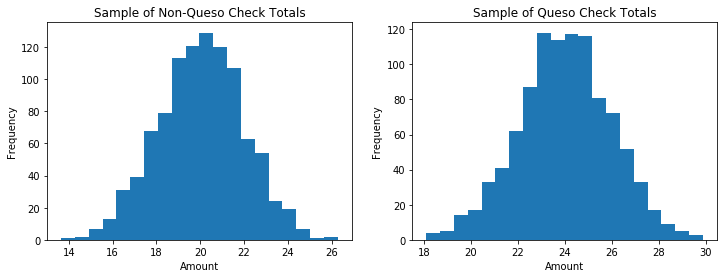

In [15]:
# Run this cell without changes

# Load the sample data 
no_queso = pickle.load(open('data/no_queso.pkl', 'rb'))
queso = pickle.load(open('data/queso.pkl', 'rb'))

# Plot histograms

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Non-Queso Check Totals')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Frequency')
ax1.hist(no_queso, bins=20)

ax2.set_title('Sample of Queso Check Totals')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Frequency')
ax2.hist(queso, bins=20)
plt.show()

### Hypotheses and Errors

The restaurant owners want to know if customers who order queso spend **more or less** than customers who do not order queso.

### 2.1) Set up the null $H_{0}$ and alternative hypotheses $H_{A}$ for this test.

In [ ]:
"""
Written answer here

Null Hypothesis: 
Customers spend the same amount when ordering queso

Alternative Hypothesis: 
Customers who order queso spend more or less than customers who do not
"""

### 2.2) What does it mean to make `Type I` and `Type II` errors in this specific context?

In [ ]:
"""
Written answer here
Type I: We reject the null hypothesis when it is TRUE. 
We think the customers spend the DIFFERENT amount, but they IN FACT spend the SAME amount

Type II: We fail to reject the null hypothesis is FALSE.
We think the customers spend the SAME amount, but they IN FACT spend DIFFERENT amounts

"""

### Sample Testing

### 2.3) Run a statistical test on the two samples. Can you reject the null hypothesis? 

Use a significance level of $\alpha = 0.05$. You can assume the two samples have equal variance.

You can use `scipy.stats` to find the answer if you like.  It has already been imported as `stats` and the statistical testing documentation can be found [here](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests).

In [16]:
stats.ttest_ind(queso, no_queso)

Ttest_indResult(statistic=45.16857748646329, pvalue=1.29670967092511e-307)

In [ ]:
"""
Written answer here

P.value is less then (alpha)
pvalue < 0.05
We reject the null hypothesis

"""

---
## Part 3: Bayesian Statistics [Suggested time: 15 minutes]
---
### Bayes' Theorem

Thomas wants to get a new puppy 🐕 🐶 🐩 


<img src="https://media.giphy.com/media/rD8R00QOKwfxC/giphy.gif" />

He can choose to get his new puppy either from the pet store or the pound. The probability of him going to the pet store is $0.2$. 

He can choose to get either a large, medium or small puppy.

If he goes to the pet store, the probability of him getting a small puppy is $0.6$. The probability of him getting a medium puppy is $0.3$, and the probability of him getting a large puppy is $0.1$.

If he goes to the pound, the probability of him getting a small puppy is $0.1$. The probability of him getting a medium puppy is $0.35$, and the probability of him getting a large puppy is $0.55$.

### 3.1) What is the probability of Thomas getting a small puppy?
Show your work, not just the final result

In [17]:
# P(PS) = 0.2
# P(small | PS) = 0.6
# P(med | PS) = 0.3
# P(large | PS) = 0.1

# P(#) = 0.8
# P(small | #) = 0.1
# P(med | #) = 0.35
# P(large | #) = 0.55

In [ ]:
# Code here to find the probability

"""
P(small) = P(small | PS) * P(PS) + P(small | #) * P(#)
P(small) = 0.6 * 0.2 + 0.1 * 0.8
P(small) = 0.12 + 0.08

"""

In [21]:
P_small = 0.6 * 0.2 + 0.1 * 0.8
P_small

0.2

### 3.2) Given that he got a large puppy, what is the probability that Thomas went to the pet store?
Show your work, not just the final result

In [ ]:
"""
what is the probability that Thomas went to the pet store, Given that he got a large puppy.

P(A) = PS
P(B) = large = 0.8
P(large) =  1 - 0.2 = 0.8

P(PS | large) = P(large | PS) * P(PS) / P(large)
0.1 * 0.2 / 0.8
"""

In [24]:
# Code here to find the probability
P_ps_given_large = 0.1 * 0.2 / 0.8
P_ps_given_large

0.025000000000000005

### 3.3) Given that Thomas got a small puppy, is it more likely that he went to the pet store or to the pound?
Show your work, not just the final result

In [ ]:
"""
Written answer here for which is more likely
P(PS | large) = 0.025
P(PS | small) = 1 - 0.025 = 0.975

P(PS | small) = 0.975

P(# | small) = (small | #) * P(#) / P(small)

0.1 * 0.8 / 0.2

P(# | small) = 0.40

"""

# Thomas is more likely went to the Pet Store given that he got a small puppy!!

In [25]:
0.1 * 0.8 / 0.2

0.4000000000000001

### 3.4) For Question 3.2, what are the prior, posterior, and likelihood?

In [26]:
"""
P(PS | large) = P(large | PS) * P(PS) / P(large)


Written answer here for the prior
Probability of going to the Pet Store

Written answer here for the posterior
What is the probability of going to the Pet Store, given he got a large puppy

Written answer here for the likelihood
What is the probability of getting a large puppy, given he went to the Pet Store
"""

'\nP(PS | large) = P(large | PS) * P(PS) / P(large)\n\n\nWritten answer here for the prior\nProbability of going to the Pet Store\n\nWritten answer here for the posterior\nWhat is the probability of going to the Pet Store, given he got a large puppy\n\nWritten answer here for the likelihood\nWhat is the probability of getting a large puppy, given he went to the Pet Store\n'

---
## Part 4: Linear Regression [Suggested Time: 10 min]
---

In this section, you'll be using the Advertising data, and you'll be creating linear models that are more complicated than a simple linear regression. The relevant modules have already been imported at the beginning of this notebook. We'll load and prepare the dataset for you below.

In [27]:
# Run this cell without changes

data = pd.read_csv('data/advertising.csv').drop('Unnamed: 0', axis=1)
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [35]:
# Run this cell without changes

X = data.drop('sales', axis=1)
y = data['sales']

In the linear regression section of the curriculum, you analyzed how TV, Radio, and Newspaper spendings individually affected the Sales figures. Here, we'll use all three together in a multiple linear regression model!

### 4.1) Create a Correlation Matrix for `X`.

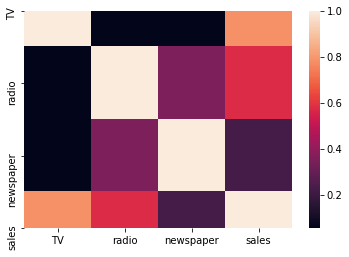

In [30]:
sns.heatmap(data.corr())

### 4.2) Based on this correlation matrix only, would you recommend to use `TV`, `radio`, and `newspaper` in the same multiple linear regression model?

In [ ]:
"""
Written answer here

Yes, I would recommend usings TV, radio, and newspaper in the same multiple linear regression model
because they are NOT very correlated to one another. 

"""

### 4.3) Use StatsModels' `ols`-function to create a multiple linear regression model with `TV`, `radio`, and `newspaper` as independent variables and `sales` as the dependent variable. 

**Required output:** the model summary of this multiple regression model.

In [38]:
# Code here 
stats_model = sm.OLS(y, X).fit()
stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Wed, 18 Mar 2020   Prob (F-statistic):                   2.43e-171
Time:                        10:53:47   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4.4) Do we have any statistically significant coefficients? If the answer is yes, list them below.

In [ ]:
"""
Written answer here

Possibly only radio, seeing how it has a slight higher coefficent

"""